In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# ! rm *.csv
# ! wget -e "https_proxy=http://127.0.0.1:41091" https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
# ! wget -e "https_proxy=http://127.0.0.1:41091" https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
# ! wget -e "https_proxy=http://127.0.0.1:41091" https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

--2021-01-27 00:36:07--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Connecting to 127.0.0.1:41091... connected.
Proxy request sent, awaiting response... 200 OK
Length: 453584 (443K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 442.95K   453KB/s    in 1.0s    

2021-01-27 00:36:08 (453 KB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [453584/453584]

--2021-01-27 00:36:08--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Connecting to 127.0.0.1:41091... connected.
Proxy request sent, awaiting response... 200 OK
Length: 315459 (308K) [text/plain]
Saving to: ‘time_series_covid19_deaths_global.csv’

time_series_covid19 100%[===================>] 308.07K   742KB/s    in 0.4s    

2021-01-27 00:36:09 (742 KB/s

In [12]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")

confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476


In [13]:
cols = confirmed_df.keys()
countries = list(set(confirmed_df[cols[1]]))
dates = confirmed_df.loc[:, cols[4]:cols[-1]].keys()

In [16]:
countries_df = pd.DataFrame(index=countries, columns=["confirmed", "deaths", "recovered"])
for country in countries:
    for type_, df in zip(["confirmed", "deaths", "recovered"], [confirmed_df, deaths_df, recovered_df]):
        countries_df.loc[country, type_] = df[df["Country/Region"]==country][dates[-1]].sum()
        
sort_by_confirmed = countries_df.sort_values("confirmed", ascending=False)
sort_by_confirmed.head(10)

,confirmed,deaths,recovered
US,25297059,421129,0
India,10676838,153587,10345985
Brazil,8871393,217664,7864969
Russia,3698246,68841,3117405
United Kingdom,3680101,98723,9036
France,3116355,73636,223823
Spain,2593382,56208,150376
Italy,2475372,85881,1897861
Turkey,2435247,25210,2314403
Germany,2154656,53127,1859936


<AxesSubplot:>

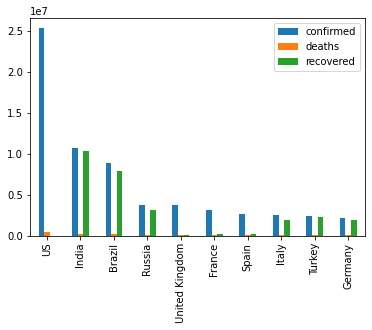

In [17]:
sort_by_confirmed.head(10).plot.bar()

<AxesSubplot:ylabel='confirmed'>

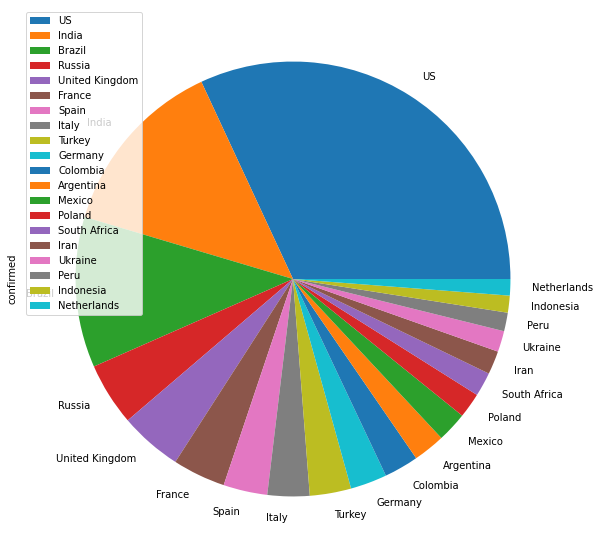

In [18]:
sort_by_confirmed.head(20).plot.pie(y="confirmed", figsize=(10,10))